# <center>L2 Computational Physics</center>
---

## Gradient Descent

In this notebook, you shall illustrate the different behaviours of the gradient descent (GD) method when finding the minima of 
*Rosenbrock's Banana Function*,

$$f(x,y) \equiv (1-x)^{2} + 100(y-x^{2})^{2}~.$$

You will generate a plot demonstrating how the behaviour of the GD method changes with different values of the step-size parameter, $\eta$. To do this, you will plot example GD trajectories using three different $\eta$ values. 

In [3]:
import numpy
from matplotlib import pyplot as plt
import matplotlib.colors
from random import random

First, define the functions `f` and `grad` which implement the *banana* function and its **analytical** derivative. 
`r` is a two component array of coordinates.

In [4]:
def f(r):
    '''Function to be minimised'''
    x, y = r
    # YOUR CODE HERE
    return (1-x)**2+100*(y-x**2)**2
    
    
def grad(r):
    '''Calculate gradient of banana function at coordinates r = (x,y)'''
    x, y = r
    # YOUR CODE HERE
    g=[2*x-2+400*(x**3-x*y),200*(y-x**2)]
    return g
    

Before proceeding, ensure that your functions have been written correctly:

In [5]:
# these tests are worth 2 marks 
r = numpy.array([1, 4])
assert numpy.isclose(f(r), 900)
assert numpy.isclose(grad(r), numpy.array([-1200,   600])).all()

Implement the function `gradientDescent`. It takes as argument:

- `df`: the derivative of the the function you want to minimize
- `r0`: an array of two initial values where the algorithm starts
- `eta`: the step size
- `nstep`: the number of steps

It should return the history of points visited, including the initial one.

In [18]:
def gradientDescent(df, r0, eta, nstep):
    xy = r0
    history = numpy.empty( (nstep+1, 2) )
    history[0]=r0
    for i in range (0 , nstep):
        p = history[i][0]-df(history[i])[0]*eta
        q = history[i][1]-df(history[i])[1]*eta
        history[i+1]=numpy.array([p,q])
    return history


Test your answer:

In [19]:
# these tests are worth 3 marks 
gdtest = gradientDescent(grad, [0.3,0.4], 0.01, 2)
assert gdtest.shape == (3,2)
assert numpy.isclose(gdtest, numpy.array([
        [ 0.3       ,  0.4       ],
        [ 0.686     , -0.22      ],
        [-1.20271542,  1.161192  ]])).all()

## Plotting task

Create a plot to show the trajectory of the gradient descent optimisation algorithm for different values of $\eta$. Use the values of $\eta$ provided. Start all trajectories at $r_0=(0.2,1)$. [3 marks]

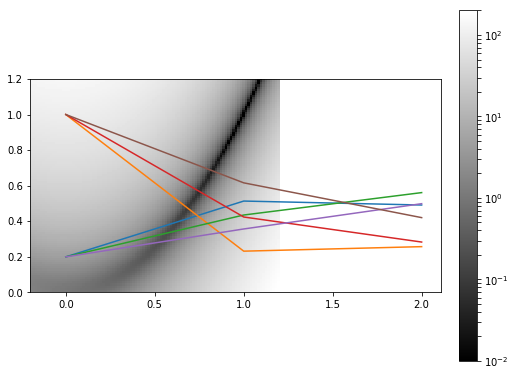

In [26]:
# Generate banana function
N = 100 # Resolution of 2D image
x0 = -0.2
x1 = 1.2
y0 = 0
y1 = 1.2
xs = numpy.linspace(x0, x1, N)
ys = numpy.linspace(y0, y1, N)
dat = numpy.zeros((N, N))

for ix, x in enumerate(xs):
    for iy, y in enumerate(ys):
        r = [x,y]
        dat[iy, ix] = f(r)

plt.figure(figsize=(8,8))
im = plt.imshow(dat, extent=(x0, x1, y0, y1), origin='lower', cmap=matplotlib.cm.gray, 
                norm=matplotlib.colors.LogNorm(vmin=0.01, vmax=200))
plt.colorbar(im, orientation='vertical', fraction=0.03925, pad=0.04)

# Now generate the trajectories:
gammas = [0.004, 0.003, 0.002]  # Gammas to try out
r0 = numpy.array([0.2, 1])  # Initial seed point
for elem in gammas:
    h = gradientDescent(grad, r0, elem, 2)
    plt.plot(h)



Which of the three step size $\eta$ is best? Use the box below to justify your answer. [2 marks]

YOUR ANSWER HERE